# WINNING HORSE - Modelo de datos

In [ ]:
# Lectura de información
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Otros
import itertools
import matplotlib.mlab as mlab
import seaborn as sns

# DataScience
import joblib
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #Solo para numéricas
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier


## DataSet

In [7]:
df = pd.read_csv("../data/results/winning_horse_limpieza.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        14996 non-null  object 
 1   Distance                      14996 non-null  int64  
 2   Category                      14996 non-null  object 
 3   MajorEvent                    14996 non-null  float64
 4   GroundCondition               14996 non-null  float64
 5   Stick                         14996 non-null  float64
 6   HorseName                     14996 non-null  object 
 7   StartingStall                 14996 non-null  int64  
 8   Weight                        14996 non-null  int64  
 9   JockeyName                    14996 non-null  object 
 10  ChampionshipType              14996 non-null  object 
 11  OwnerName                     14996 non-null  object 
 12  TOP1                          14996 non-null  int64  
 13  T

In [9]:
print(df.head(10));

  Region  Distance Category  MajorEvent  GroundCondition     Stick  \
0  SOUTH      2646     -100         1.0         5.188576  7.177653   
1  SOUTH      2646     -100         1.0         5.188576  7.177653   
2  SOUTH      2646     -100         1.0         5.188576  7.177653   
3  SOUTH      2646     -100         1.0         5.188576  7.177653   
4  SOUTH      2646     -100         1.0         5.188576  7.177653   
5  SOUTH      2646     -100         1.0         5.188576  7.177653   
6  SOUTH      2646     -100         1.0         5.188576  7.177653   
7  SOUTH      2646     -100         1.0         5.188576  7.177653   
8  SOUTH      2646     -100         1.0         5.188576  7.177653   
9  SOUTH      2646     -100         1.0         5.188576  7.177653   

               HorseName  StartingStall  Weight         JockeyName  ...  \
0     Sonny Liston (IRE)             12     128       Tom Marquand  ...   
1   Grand Alliance (IRE)              5     128     Daniel Tudhope  ...   
2   

In [14]:
df["Category"].value_counts()

-100                        13011
4                            1385
Local Restrictions Apply      600
Name: Category, dtype: int64

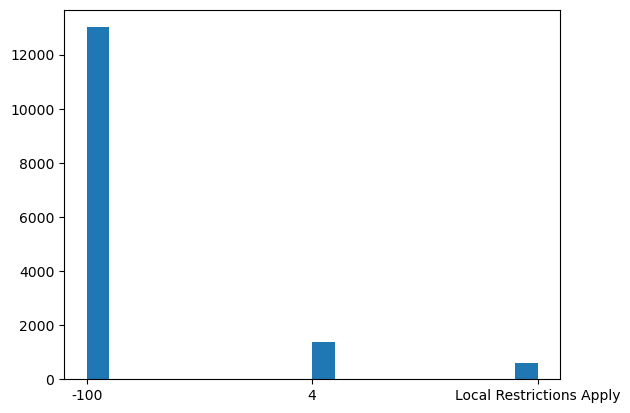

In [15]:
plt.hist(df["Category"], bins=20, label="Category")
plt.show()

### Correlaciones

In [ ]:
corr = df.corr(numeric_only=True)

# Pintemos las correlaciones
plt.figure(figsize=(70, 50))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

## FASE DE ENTRENAMIENTO

In [ ]:
#Naive Bayes Categorico necesita codificar todas las variables categóricas en Dummies
#Escoger entre df_Flat y df_Jump
muestra = pd.get_dummies(df)

#Eliminamos todos los dataframes utilizados hasta ahora para liberar espacio
#del (df, df_Flat, df_Jump, dummies)

#Extraemos las variables dependientes y las independientes
X = muestra.drop(["TOP1", "TOP3", "TOP5"], axis = 1)
y_top1 = muestra["TOP1"]
y_top3 = muestra["TOP3"]
y_top5 = muestra["TOP5"]

y_multi = muestra[["TOP1","TOP3","TOP5"]]

#Eliminamos el dataframe original para ahorrar espacio
del (muestra)

Separación del dataframe en Train y Test (80/20 manteniendo distribución)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_top1, test_size=0.2, random_state=0, stratify=y_top1)

Generación de un modelo Bayesiano

In [ ]:
Gnb=GaussianNB()

Entrenamiento del modelo

In [ ]:
Gnb.fit(X_train, y_train)

Guardamos el modelo

In [ ]:
joblib.dump(Gnb, '../models/Gnb.pkl')

In [ ]:
Gnb = joblib.load('../models/Gnb.pkl')
Gnb.score(X_test, y_test)

## FASE DE EVALUACIÓN

### Evaluación Clase única (depuración)

In [ ]:
y_pred=Gnb.predict(X_test)
print(classification_report(y_test,y_pred))

### Evaluación Multiclase

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=0, stratify=y_multi)
ovr_clf=OneVsRestClassifier(GaussianNB()).fit(X_train,y_train)
ovr_clf.predict_proba(X_test)
y_pred_multi = ovr_clf.predict(X_test)
print(classification_report(y_test,y_pred_multi))